# Chapter 6, System of First-order Linear Equations

## 6.1 Introduction &

## 6.2 Matrices & 

## 6.3 Systems of Linear Algebric Equations; Linear Independence, Eigenvalues, Eigenvectors & 

## 6.4 Basic Theory of Systems of First-order Linear Equations

Chapter 6.1, 6.2, 6.3은 모두 선형대수 복습이기에 skip했습니다.

Chapter 6.4 역시 Analytic한 증명이 대부분이고 Wronskian과 Abel's theorem은 이미 했기때문에 추가 구현할 만한 내용이 없어 skip하겠습니다. 

## 6.5 Homogeneous Linear Systems with Constant Coefficients

이번 Chapter에서는 eigenvalue, eigenvector를 이용해 미분방정식 system의 해를 찾는 방법에 대해 다룹니다.

편의를 위해 $$x' = Matrix * x$$에서 Matrix를 입력받도록 하겠습니다.

책에 나온대로 Direction Field도 그려보겠습니다.

Solution : 
[8.98252518496593*c1*t + 0.329041375193592*c2*t
 -8.98252518496592*c1*t + 0.329041375193592*c2*t]


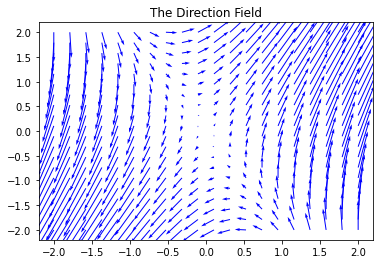

In [78]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x')
r = sy.symbols('r')
c, c1, c2 = sy.symbols('c, c1, c2')
t = sy.symbols('t')
matrix = np.array([[1, 1], [4, 1]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Solution : ")
print(c1*eigenvectors[0]*sy.exp(eigenvalues[0])*t + c2*eigenvectors[1]*sy.exp(eigenvalues[1])*t)

# Direct system field 그리기
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_range, y_range)
U = X + Y
V = 4 * X + Y
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=10)
plt.title('The Direction Field')
plt.show()

# Discrete solution components
c_values = np.linspace(0, 30, 5)  # 다양한 c_value 값
t_values = np.linspace(0, 0.5, 10)

# 각 sol component를 Numpy 함수로 변환하지 않고 직접 람다 함수 생성
sol_component_x1 = lambda t, c: c * (eigenvectors[0, 0] * np.exp(eigenvalues[0] * t) + eigenvectors[0, 1] * np.exp(eigenvalues[1] * t))
sol_component_x2 = lambda t, c: c * (eigenvectors[1, 0] * np.exp(eigenvalues[0] * t) + eigenvectors[1, 1] * np.exp(eigenvalues[1] * t))


## 6.6 Complex-Valued Eigenvalues

이번 Chapter에서는 eigenvalue가 허근이 나오는 경우의 미분방정식 system의 해를 찾는 방법에 대해 다룹니다. solution 부분을 조금 수정해주면 6.5와 크게 다르지 않습니다.


0.500000000000000 1.00000000000000
Solution : 
[c1*exp(0.5*t)*cos(1.0*t) + c2*exp(0.5*t)*sin(1.0*t)
 -c1*exp(0.5*t)*sin(1.0*t) + c2*exp(0.5*t)*cos(1.0*t)]


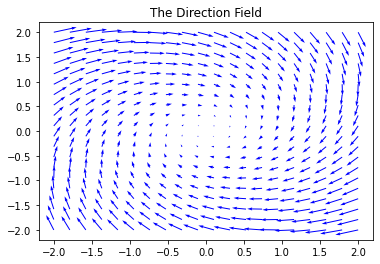

In [76]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x')
r = sy.symbols('r')
c, c1, c2 = sy.symbols('c, c1, c2')
t = sy.symbols('t')
matrix = np.array([[-1/2, 1], [-1, -1/2]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)

real = abs([sy.re(eigval) for eigval in eigenvalues][0])
img = abs([sy.im(eigval) for eigval in eigenvalues][0])

print(real, img)


vectors_1 = np.array([sy.cos(img*t), -sy.sin(img*t)])
vectors_2 = np.array([sy.sin(img*t), sy.cos(img*t)])

print("Solution : ")
print(c1*vectors_1*sy.exp(real*t) + c2*vectors_2*sy.exp(real*t))

# Direct system field 그리기
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_range, y_range)
U = -1/2*X + Y
V = -1 * X + -1/2*Y
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=10)
plt.title('The Direction Field')
plt.show()

# Discrete solution components
c_values = np.linspace(0, 30, 5)  # 다양한 c_value 값
t_values = np.linspace(0, 0.5, 10)

# 각 sol component를 Numpy 함수로 변환하지 않고 직접 람다 함수 생성
sol_component_x1 = lambda t, c: c*vectors_1*sy.exp(real*t)
sol_component_x2 = lambda t, c: c*vectors_2*sy.exp(real*t)



## 6.7 Fundamental Matries

이번 Chapter에서는 각 열이 모두 eigenvector인 Fundamental Matrice에 대해 다룹니다. 이때까지 한 것과 큰 차이가 없습니다.

In [82]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x')
r = sy.symbols('r')
c, c1, c2 = sy.symbols('c, c1, c2')
t = sy.symbols('t')
matrix = np.array([[6, -1], [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)

sol = np.array([eigenvector for eigenvector in eigenvectors])
fundamental_matrix = sol.T

print(fundamental_matrix)

[[0.707 0.707]
 [0.447 0.894]]


## 6.8 Repeated Eigenvalues

이번 Chapter에서는 중근에 대해 다룹니다. 책에 나와있는 알고리즘대로 구현하면 전 Chapter들과 크게 다르지는 않습니다.

Solution : 
[0.707106788637128*c1*exp(2.00000002107342*t) + 0.707106788637128*c2*t*exp(2.00000002107342*t + 1.0*exp(2.00000002107342*t))
 0.707106773735967*c1*exp(2.00000002107342*t) + 0.707106773735967*c2*t*exp(2.00000002107342*t + 1.0*exp(2.00000002107342*t))]


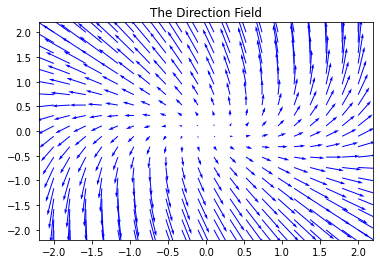

In [91]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x = sy.symbols('x')
r = sy.symbols('r')
c, c1, c2 = sy.symbols('c, c1, c2')
t = sy.symbols('t')
matrix = np.array([[1, -1], [1, 3]])

eigenvalues, eigenvectors = np.linalg.eig(matrix)

revised_matrix = matrix - 2 * np.identity(2)

vector = np.array(1, (eigenvectors[0][0] - revised_matrix[0][0])/revised_matrix[0][1]) 

print("Solution : ")
print(c1*eigenvectors[1]*sy.exp(eigenvalues[0]*t) + c2*(eigenvectors[1]*t*sy.exp(eigenvalues[0]*t + vector*sy.exp(eigenvalues[0]*t))))

# Direct system field 그리기
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_range, y_range)
U = 1*X + -1*Y
V = 1 * X + 3*Y
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=10)
plt.title('The Direction Field')
plt.show()

# Discrete solution components
c_values = np.linspace(0, 30, 5)  # 다양한 c_value 값
t_values = np.linspace(0, 0.5, 10)

# 각 sol component를 Numpy 함수로 변환하지 않고 직접 람다 함수 생성
sol_component_x1 = lambda t, c: c*vectors_1*sy.exp(real*t)
sol_component_x2 = lambda t, c: c*vectors_2*sy.exp(real*t)



## 6.9 Nonhomogeneous Linear Systems

마지막 Chapter로 $$x' = Matrix * x +g(t)$$의 미분방정식 system을 푸는 부분입니다.

몇 가지 방법들이 나오는데 컴퓨터로 구현하기 가장 좋은 방법을 찾아 보는 중, eigenvector을 normalize한 행렬과 eigenvalue의 대각행렬로 푸는 방법이 가장 좋아보였습니다. 이 방법으로 구현해보겠습니다.

In [123]:
import sympy as sy
import numpy as np

t = sy.symbols('t')
y = sy.Function('y')(t)
c1, c2 = sy.symbols('c1 c2')
C1 = sy.symbols('C1')

matrix = np.array([[-2, 1], [1, -2]])
g = [2*sy.exp(-t), 3*t]
eigenvalues, eigenvectors = np.linalg.eig(matrix)

T_matrix = np.array(eigenvectors)

eq1 = sy.Eq(eigenvalues[0] * y - sy.diff(y, t) + (eigenvectors[0][0]*g[0] + eigenvectors[0][1]*g[1])/np.linalg.det(T_matrix) , 0)
eq2 = sy.Eq(eigenvalues[1] * y - sy.diff(y, t) + (eigenvectors[1][0]*g[0] + eigenvectors[1][1]*g[1])/np.linalg.det(T_matrix) , 0)

y1 = sy.dsolve(eq1, y)
y2 = sy.dsolve(eq2, y)

y1 = y1.subs(C1, c1)
y2 = y2.subs(C1, c2)

original_T = sy.Matrix(T_matrix.T)
y_t = np.array([y1.rhs, y2.rhs])  # Extract right-hand side of the solutions
y_matrix = sy.Matrix(y_t.T)

solution_matrix = (original_T * y_matrix) / np.linalg.det(T_matrix)

# Display the solution
print("Solution:")
display(solution_matrix[0])
display(solution_matrix[1])


[[ 0.707 -0.707]
 [ 0.707  0.707]]
Solution:


                      -3.0⋅t                                                  
0.707106781186548⋅c₂⋅ℯ       - 0.999999999999999⋅t + 0.707106781186548⋅(c₁ + 1

                   -t                                         -t
.4142135623731⋅t)⋅ℯ   + 1.33333333333333 + 0.500000000000002⋅ℯ  

                      -3.0⋅t                                                  
0.707106781186548⋅c₂⋅ℯ       + 2.0⋅t - 0.707106781186548⋅(c₁ + 1.4142135623731

     -t                                         -t
⋅t)⋅ℯ   - 1.66666666666667 + 0.500000000000002⋅ℯ  